<a href="https://colab.research.google.com/github/farhanfuadabir/Hand-Gesture-Recognition/blob/main/Model__Classical_ML/Hand_Gesture_Recognition_Classical_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import** Data



In [ ]:
!git clone https://github.com/farhanfuadabir/Hand-Gesture-Recognition.git
!unzip -q /content/Hand-Gesture-Recognition/ContinuousDataAcquisitionPython/Data_032021/\*.zip -d /content/

Cloning into 'Hand-Gesture-Recognition'...
fatal: could not read Username for 'https://github.com': No such device or address
unzip:  cannot find or open /content/Hand-Gesture-Recognition/ContinuousDataAcquisitionPython/Data_032021/*.zip, /content/Hand-Gesture-Recognition/ContinuousDataAcquisitionPython/Data_032021/*.zip.zip or /content/Hand-Gesture-Recognition/ContinuousDataAcquisitionPython/Data_032021/*.zip.ZIP.

No zipfiles found.


In [ ]:
!unzip -q /content/\*.zip


7 archives were successfully processed.


In [ ]:
# !unzip -q /content/Hand-Gesture-Recognition/ContinuousDataAcquisitionPython/Data_032021/\*.zip -d /content/bla/

In [ ]:
ala = load("001/Processed/l/flex_1.joblib")
bla = load("002/Processed/l/flex_1.joblib")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

axes[0].plot(np.arange(1,151), ala[5,:])
axes[1].plot(np.arange(1,151), ala[6,:])

plt.show()

NameError: ignored

In [ ]:
ala = load("001/Processed/hello/flex_1.joblib")
bla = load("002/Processed/goodbye/flex_1.joblib")

# print(np.maximum(np.zeros([10,150]),ala).max())

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

axes[0].plot(np.arange(1,151), bla[2,:])


# bla2 = [np.max(ala), np.min(ala)]
# print(bla2)

# bla = (bla-min) / (max-min)

axes[1].plot(np.arange(1,151), la[2,:])


# import pandas as pd
# import matplotlib.pyplot as plt
# # from scipy import signal

# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# data = pd.read_csv('001/a.csv')
# data.loc[:, "flex_1":"flex_5"].plot(ax=axes[0])

# data = pd.read_csv('007/a.csv')
# data.loc[:, "flex_1":"flex_5"].plot(ax=axes[1])

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# from scipy import signal

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

data = pd.read_csv('001/a.csv')
data.loc[:, "flex_1":"flex_5"].plot(ax=axes[0])

data = pd.read_csv('007/a.csv')
data.loc[:, "flex_1":"flex_5"].plot(ax=axes[1])

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# from scipy import signal

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

data = pd.read_csv('001/a.csv')
data.loc[:, "flex_1":"flex_5"].plot(ax=axes[0])

data = pd.read_csv('007/a.csv')
data.loc[:, "flex_1":"flex_5"].plot(ax=axes[1])

plt.show()

# **Load** Dependencies

In [ ]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import librosa as lb
from joblib import load, dump
from tqdm.notebook import tqdm
from sklearn import preprocessing
import matplotlib.pyplot as plt

# **Constants**

In [ ]:
# Get user list
# _, filenames, _ = next(os.walk("/content/Hand-Gesture-Recognition/ContinuousDataAcquisitionPython/Data_032021"))
# users = [os.path.splitext(x)[0] for x in filenames]
# users = sorted(users, key=lambda x: (len(x), x))
users = ['001', '002', '003', '004', '005', '006', '007']
print(users)

['001', '002', '003', '004', '005', '006', '007']


In [ ]:
# Indicate segmentLength, recorditeration according to the 'serialDataAcquisition_segmented.py' script
segmentLength = 150
recorditeration = 10

# ColumnNames according to the 'serialDataAcquisition_segmented.py' script
columnName = ['timestamp', 'user_id',
              'flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5',
              'Qw', 'Qx', 'Qy', 'Qz',
              'GYRx', 'GYRy', 'GYRz',
              'ACCx', 'ACCy', 'ACCz',
              'ACCx_body', 'ACCy_body', 'ACCz_body',
              'ACCx_world', 'ACCy_world', 'ACCz_world']

# gestures = get_gesture_names(userPath)
gestures = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
            'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
            'bad', 'deaf', 'fine', 'good', 'goodbye', 'hello', 'hungry',
            'me', 'no', 'please', 'sorry', 'thankyou', 'yes', 'you']

print('Gesture List: ', gestures)
print('Number of Gestures: ', len(gestures))

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(gestures)
print("Number of Gestures Encoded: ", len(label_encoder.classes_))

Gesture List:  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'bad', 'deaf', 'fine', 'good', 'goodbye', 'hello', 'hungry', 'me', 'no', 'please', 'sorry', 'thankyou', 'yes', 'you']
Number of Gestures:  40
Number of Gestures Encoded:  40


# **Load** Functions

In [ ]:
# Extract user list from the Dataset

def get_user_list(userPath):
  _, filenames, _ = next(os.walk("/content/Hand-Gesture-Recognition/ContinuousDataAcquisitionPython/Data_032021"))
  users = [os.path.splitext(x)[0] for x in filenames]
  users = sorted(users, key=lambda x: (len(x), x))
  
  return users

In [ ]:
# Extract gesture names from the filenames

def get_gesture_names(userPath):
  _, _, filenames = next(os.walk(userPath))
  gestures = [os.path.splitext(x)[0] for x in filenames]
  gestures = sorted(gestures, key=lambda x: (len(x), x))

  return gestures

In [ ]:
# Extract rolling median and rolling mean filters on each channel

def apply_rolling_filters(path=''):

  # SPIKE REMOVAL FOR ALL USERS -> ROLLING MEDIAN[3]
  users = ['001', '002', '003', '004', '005', '006', '007']
  channels = ["flex_1", "flex_2", "flex_3", "flex_4", "flex_5"]

  gestures = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
              'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
              'bad', 'deaf', 'fine', 'good', 'goodbye', 'hello', 'hungry',
              'me', 'no', 'please', 'sorry', 'thankyou', 'yes', 'you']

  for user in users:
    for gesture in gestures:
      data = pd.read_csv(path + user + '/' + gesture + '.csv')
      for mode in channels:
        data[mode] = data[mode].rolling(3, center=True).median()
        data = data.fillna(method='bfill')
        data = data.fillna(method='ffill')
      data.to_csv(path + user + '/' + gesture + '.csv', index=False)


  # SMOOTHING FOR USER 2 ('a'-'m') -> ROLLING AVERAGE[10]
  users = ['002']
  channels = ["flex_1", "flex_2", "flex_3", "flex_4", "flex_5"]

  gestures = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']

  for user in users:
    for gesture in gestures:
      data = pd.read_csv(path + user + '/' + gesture + '.csv')
      for mode in channels:
        data[mode] = data[mode].rolling(10, center=True).mean()
        data = data.fillna(method='bfill')
        data = data.fillna(method='ffill')
      data.to_csv(path + user + '/' + gesture + '.csv', index=False)


  # SMOOTHING FOR USER 4 -> ROLLING AVERAGE[10]
  users = ['004']
  channels = ["flex_1", "flex_2", "flex_3", "flex_4", "flex_5"]

  gestures = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
              'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
              'bad', 'deaf', 'fine', 'good', 'goodbye', 'hello', 'hungry',
              'me', 'no', 'please', 'sorry', 'thankyou', 'yes', 'you']

  for user in users:
    for gesture in gestures:
      data = pd.read_csv(path + user + '/' + gesture + '.csv')
      for mode in channels:
        data[mode] = data[mode].rolling(10, center=True).mean()
        data = data.fillna(method='bfill')
        data = data.fillna(method='ffill')
      data.to_csv(path + user + '/' + gesture + '.csv', index=False)


  # SMOOTHING FOR USER 6 (ASL words) -> ROLLING AVERAGE[10]
  users = ['006']
  channels = ["flex_1", "flex_2", "flex_3", "flex_4", "flex_5"]

  gestures = ['bad', 'deaf', 'fine', 'good', 'goodbye', 'hello', 'hungry',
              'me', 'no', 'please', 'sorry', 'thankyou', 'yes', 'you']

  for user in users:
    for gesture in gestures:
      data = pd.read_csv(path + user + '/' + gesture + '.csv')
      for mode in channels:
        data[mode] = data[mode].rolling(10, center=True).mean()
        data = data.fillna(method='bfill')
        data = data.fillna(method='ffill')
      data.to_csv(path + user + '/' + gesture + '.csv', index=False)


  # SMOOTHING FOR ALL USERS -> ROLLING AVERAGE[10]
  users = ['001', '002', '003', '004', '005', '006', '007']
  channels = ["flex_1", "flex_2", "flex_3", "flex_4", "flex_5"]

  gestures = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
              'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
              'bad', 'deaf', 'fine', 'good', 'goodbye', 'hello', 'hungry',
              'me', 'no', 'please', 'sorry', 'thankyou', 'yes', 'you']

  for user in users:
    for gesture in gestures:
      data = pd.read_csv(path + user + '/' + gesture + '.csv')
      for mode in channels:
        data[mode] = data[mode].rolling(10, center=True).mean()
        data = data.fillna(method='bfill')
        data = data.fillna(method='ffill')
      data.to_csv(path + user + '/' + gesture + '.csv', index=False)

In [ ]:
# Extract Channels From Raw Dataset

def extract_channels(columns, segmentLength, recorditeration, 
                     userPath, storePath, writeFormat='JOBLIB'):
  # Make a directory named 'Channels' in the 'storePath' if there is none already
  if not os.path.isdir(storePath):
    currentPath = os.getcwd()
    os.mkdir(currentPath + '/' + storePath)
    print("Created Folder: ", currentPath + '/' + storePath)

  if 'user_id' in columns:
    columns.remove('user_id')

  for file in gestures:
    # Make a directory after the gesture name in the 'Channels' folder, if there is none already
    if not os.path.isdir(storePath + '/' + file):
      currentPath = os.getcwd()
      os.mkdir(currentPath + '/' + storePath + '/' + file)

    source = pd.read_csv(userPath + '/' + file + '.csv')    
    
    for channel in columns:
      temp = source[channel].to_numpy()    
      arr = np.expand_dims(temp, axis=0).reshape(-1,segmentLength)
      if writeFormat.lower() == 'joblib':
        dump(arr, storePath + '/' + file + '/' + channel + '.joblib')
      elif writeFormat.lower() == 'csv':
        np.savetxt(storePath + '/' + file + '/' + channel + '.csv', arr, delimiter=",")
      else:
        raise ValueError("Invalid WriteFormat. This function can only write 'CSV' or 'JOBLIB'.")
  
  compile_channels(columns, storePath)


def compile_channels(columnName, storePath, verbose=False):
  for channel in columnName:
    df = pd.DataFrame()

    for file in gestures:
      temp = load(storePath + '/' + file + '/' + channel + '.joblib')
      temp = pd.DataFrame(temp)
      #to add label with the data
      temp = temp.assign(label=file)   
      df = df.append(temp, ignore_index=True)
    
    if verbose == True:
      print('Processing ', channel, '... Done | shape: ', df.shape)
    
    if not os.path.isdir(storePath + '/Channels'):
      currentPath = os.getcwd()
      os.mkdir(currentPath + '/' + storePath + '/Channels')
    
    dump(df['label'], storePath + '/label' + '.joblib')
    df = df.drop(['label'], axis=1).to_numpy()
    dump(df, storePath + '/Channels/' + channel + '.joblib')

In [ ]:
# Scale Channels Per User within (0, 1)

def scale_channels_per_user(users, channels, gestures, path=''):

  print(users)
  print(channels)
  print(gestures)

  max = [[] for i in range(len(users))]
  min = [[] for i in range(len(users))]

  max_gesture = [[] for i in range(len(users))]
  min_gesture = [[] for i in range(len(users))]
  for idx_user, user in enumerate(users):
    for channel in channels:
      max_array = np.zeros([recorditeration, segmentLength])
      min_array = np.full((recorditeration, segmentLength), 1000) 
      for gesture in gestures:
        data = load(path + user + '/Processed/' + gesture + '/' + channel + '.joblib')
        if np.max(data) > np.max(max_array):
          max_temp = gesture
        if np.min(data) < np.min(min_array):
          min_temp = gesture
        max_array = np.maximum(max_array, data)
        min_array = np.minimum(min_array, data)
      max[idx_user].append(np.max(max_array))
      min[idx_user].append(np.min(min_array))
      max_gesture[idx_user].append(max_temp)
      min_gesture[idx_user].append(min_temp)

  for idx_user, user in enumerate(users):
    for idx_channel, channel in enumerate(channels):
      for gesture in gestures:
        data = load(path + user + '/Processed/' + gesture + '/' + channel + '.joblib')
        data = (data - min[idx_user][idx_channel]) / (max[idx_user][idx_channel] - min[idx_user][idx_channel])
        dump(data, path + user + '/Processed/' + gesture + '/' + channel + '.joblib')

  print("max array: ", max)
  print("max at gestures: ", max_gesture)
  print("max array length: ", len(max))
  print("min array: ", min)
  print("min at gestures: ", min_gesture)
  print("min array length: ", len(min))

# **Load** Feature Extraction Functions

In [ ]:
def correlation(x):
  cor = []
  for n in range(x.shape[0]):
    cor.append(np.correlate(x[n, :], x[n, :])[0])
  return np.array(cor)


def mean_crossing_rate(x):
  mcr = []
  for n in range(x.shape[0]):
    mcr.append(lb.feature.zero_crossing_rate(x[n, :] - np.mean(x[n, :]))[0, 0])
  return np.array(mcr)


def get_entropy(x, axis = 1):
  x = x / np.sum(x, axis = axis, keepdims=True)
  entropy = np.sum(sp.special.entr(x), axis = axis)
  return entropy


def number_of_peaks(x):
  npk = []
  for n in range(x.shape[0]):
    thres = (np.max(x[n, :]) / 3)
    peaks, _ = sp.signal.find_peaks(x[n, :], thres)
    npk.append(len(peaks))
  return np.array(npk, dtype=float)


def get_stat_features(x, axis=1, prefix=''):

  # print('Calculating Features...', end = " ")
  min = np.min(x, axis = axis)
  max = np.max(x, axis = axis)
  std = np.std(x, axis = axis)
  avg = np.mean(x, axis = axis)
  var = np.var(x, axis = axis)
  ptp = np.ptp(x, axis = axis)
  mrc = np.max(np.diff(x, axis = axis), axis = axis)
  arc = np.mean(np.diff(x, axis = axis), axis = axis)
  src = np.std(np.diff(x, axis = axis), axis = axis)
  mad = sp.stats.median_absolute_deviation(x, axis = axis)
  iqr = sp.stats.iqr(x, axis = axis)
  cor = correlation(x)
  mcr = mean_crossing_rate(x)
  rms = np.sum(np.square(x), axis = axis)
  # print('Done!')
  
  feature_names = ['min', 'max', 'std', 'avg', 'var', 
                   'ptp', 'mrc', 'arc', 'src', 'mad', 
                   'iqr', 'cor', 'mcr', 'rms']
  columnName = [prefix + '_' + sub for sub in feature_names]

  stat_features = pd.DataFrame(np.stack((min, max, std, avg, 
                                         var, ptp, mrc, arc, 
                                         src, mad, iqr, cor, 
                                         mcr, rms), axis=1), columns=columnName)

  return stat_features
 

def get_freq_features(x, axis=1, fs=100, nperseg=150, prefix=''):

  # print('Calculating Features...', end = " ")
  freq, psd = sp.signal.welch(x, fs, nperseg = nperseg, axis = axis)
  mpw = np.max(psd, axis = axis)
  ent = get_entropy(psd, axis = axis)
  ctf = np.divide(np.sum((freq * psd), axis = axis), np.sum(psd, axis = axis))
  mxf = np.argmax(psd, axis = axis)
  enr = np.sum(np.square(psd), axis = axis) / nperseg
  skw = sp.stats.skew(x, axis = axis)
  kut = sp.stats.kurtosis(x, axis = axis)
  npk = number_of_peaks(psd)
  # print('Done!')

  feature_names = ['mpw', 'ent', 'ctf', 'mxf', 'enr', 'skw', 'kut', 'npk']
  columnName = [prefix + '_' + sub for sub in feature_names]

  freq_features = pd.DataFrame(np.stack((mpw, ent, ctf, mxf, enr, skw, 
                                         kut, npk), axis=1), columns=columnName)

  return freq_features


def get_mutual_features(x, y, z, axis=1, nperseg=150, prefix=''):
  cxy = []
  cxz = []
  cyz = []
  vxy = []
  vxz = []
  vyz = []
  # print('Calculating Features...', end = " ")
  for n in range(x.shape[0]):
    cxy.append(np.corrcoef(x[n, :].ravel(), y[n, :].ravel())[0, 1])
    cxz.append(np.corrcoef(x[n, :].ravel(), z[n, :].ravel())[0, 1])
    cyz.append(np.corrcoef(y[n, :].ravel(), z[n, :].ravel())[0, 1])
    vxy.append(np.cov(x[n, :].ravel(), y[n, :].ravel())[0, 1])
    vxz.append(np.cov(x[n, :].ravel(), z[n, :].ravel())[0, 1])
    vyz.append(np.cov(y[n, :].ravel(), z[n, :].ravel())[0, 1])
  cxy = np.array(cxy)
  cxz = np.array(cxz)
  cyz = np.array(cyz)
  vxy = np.array(vxy)
  vxz = np.array(vxz)
  vyz = np.array(vyz)
  sma = (np.trapz(x, axis = axis) + np.trapz(x, axis = axis) + np.trapz(x, axis = axis)) / nperseg
  # print('Done!')

  feature_names = ['cxy', 'cxz', 'cyz', 'vxy', 'vxz', 'vyz', 'sma']
  columnName = [prefix + '_' + sub for sub in feature_names]

  mutual_features = pd.DataFrame(np.stack((cxy, cxz, cyz, vxy, vxz, vyz, sma), 
                                        axis=1), columns=columnName)

  return mutual_features


def get_velocity(x, axis = 1, nperseg = 150):
  return np.trapz(x, axis = axis) / nperseg


def get_fft_coefs(x, fs = 100, n = 20, axis = 1):
  # print('Calculating Features...', end = " ")
  _, psd = sp.signal.welch(x, fs, nperseg = n, axis = axis)
  # print('Done!')
  return psd

In [ ]:
def extract_features(storePath):

  FLEX1 = load(storePath + '/Channels/flex_1.joblib')
  FLEX2 = load(storePath + '/Channels/flex_2.joblib')
  FLEX3 = load(storePath + '/Channels/flex_3.joblib')
  FLEX4 = load(storePath + '/Channels/flex_4.joblib')
  FLEX5 = load(storePath + '/Channels/flex_5.joblib')

  ACCx = load(storePath + '/Channels/ACCx_world.joblib')
  ACCy = load(storePath + '/Channels/ACCy_world.joblib')
  ACCz = load(storePath + '/Channels/ACCz_world.joblib')

  ACCm = np.sqrt(ACCx**2 + ACCy**2 + ACCz**2)
  dump(ACCm, storePath + '/Channels/ACCm_world.joblib')

  GYRx = load(storePath + '/Channels/GYRx.joblib')
  GYRy = load(storePath + '/Channels/GYRy.joblib')
  GYRz = load(storePath + '/Channels/GYRz.joblib')

  GYRm = np.sqrt(GYRx**2 + GYRy**2 + GYRz**2)
  dump(GYRm, storePath + '/Channels/GYRm.joblib')

  stat_ACCx = get_stat_features(ACCx, axis=1, prefix="ACCx")
  stat_ACCy = get_stat_features(ACCy, prefix="ACCy")
  stat_ACCz = get_stat_features(ACCz, prefix="ACCz")
  stat_ACCm = get_stat_features(ACCm, prefix="ACCm")
  stat_GYRx = get_stat_features(GYRx, prefix="GYRx")
  stat_GYRy = get_stat_features(GYRy, prefix="GYRy")
  stat_GYRz = get_stat_features(GYRz, prefix="GYRz")
  stat_GYRm = get_stat_features(GYRm, prefix="GYRm")
  stat_FLEX1 = get_stat_features(FLEX1, prefix="FLEX1")
  stat_FLEX2 = get_stat_features(FLEX2, prefix="FLEX2")
  stat_FLEX3 = get_stat_features(FLEX3, prefix="FLEX3")
  stat_FLEX4 = get_stat_features(FLEX4, prefix="FLEX4")
  stat_FLEX5 = get_stat_features(FLEX5, prefix="FLEX5")

  freq_ACCx = get_freq_features(ACCx, prefix="ACCx")
  freq_ACCy = get_freq_features(ACCy, prefix="ACCy")
  freq_ACCz = get_freq_features(ACCz, prefix="ACCz")
  freq_ACCm = get_freq_features(ACCm, prefix="ACCm")
  freq_GYRx = get_freq_features(GYRx, prefix="GYRx")
  freq_GYRy = get_freq_features(GYRy, prefix="GYRy")
  freq_GYRz = get_freq_features(GYRz, prefix="GYRz")
  freq_GYRm = get_freq_features(GYRm, prefix="GYRm")
  freq_FLEX1 = get_freq_features(FLEX1, prefix="FLEX1")
  freq_FLEX2 = get_freq_features(FLEX2, prefix="FLEX2")
  freq_FLEX3 = get_freq_features(FLEX3, prefix="FLEX3")
  freq_FLEX4 = get_freq_features(FLEX4, prefix="FLEX4")
  freq_FLEX5 = get_freq_features(FLEX5, prefix="FLEX5")

  mutual_ACC = get_mutual_features(ACCx, ACCy, ACCz, prefix='ACC')
  mutual_GYR = get_mutual_features(GYRx, GYRy, GYRz, prefix='GYR')

  X = pd.concat([stat_ACCx, stat_ACCy, stat_ACCz, stat_ACCm, 
                stat_GYRx, stat_GYRy, stat_GYRz, stat_GYRm,
                stat_FLEX1, stat_FLEX2, stat_FLEX3, stat_FLEX4, stat_FLEX5,
                freq_ACCx, freq_ACCy, freq_ACCz, freq_ACCm,
                freq_GYRx, freq_GYRy, freq_GYRz, freq_GYRm,
                freq_FLEX1, freq_FLEX2, freq_FLEX3, freq_FLEX4, freq_FLEX5,
                mutual_ACC, mutual_GYR], axis=1)

  return X


# **Preprocess** and **Extract** Channels 

In [ ]:
# Apply Rolling Filters
print("Applying Rolling Filters...", end='')
apply_rolling_filters()
print("Done\n\n")


# Extract Channels
print("Extracting Channels...\n")

for user in tqdm(users):
  userPath = user
  storePath = userPath + '/' + 'Processed'
  extract_channels(columnName, segmentLength, recorditeration, 
                   userPath=userPath, storePath=storePath, writeFormat='joblib')
print("Done\n\n")


# # Scale Channels
# print("Applying Scaling...", end='')
# scale_channels_per_user(users=users, channels=['flex_1', 'flex_2', 'flex_3', 
#                                          'flex_4', 'flex_5'], gestures=gestures)
# print("Done\n\n")


Applying Rolling Filters...Done


Extracting Channels...



Created Folder:  /content/001/Processed
Created Folder:  /content/002/Processed
Created Folder:  /content/003/Processed
Created Folder:  /content/004/Processed
Created Folder:  /content/005/Processed
Created Folder:  /content/006/Processed
Created Folder:  /content/007/Processed

Done




# **Extract** Features and Labels

In [ ]:
# Extract Features
print("Extracting Features and Labels...\n")
feature_sets = []
label_sets = []

for user in tqdm(users):
  userPath = user
  storePath = userPath + '/' + 'Processed'
  X_temp = extract_features(storePath)
  y_temp = load(storePath + '/label.joblib')
  y_temp = y_temp.to_numpy().ravel()
  y_temp = label_encoder.transform(y_temp)
  feature_sets.append(X_temp)
  label_sets.append(y_temp)
print("Done")

Extracting Features and Labels...




Done


In [ ]:
print(len(gestures))

40


# **Set** Train and Test Sets

In [ ]:
# test_users = ['002', '004', '007']
test_users = ['002', '004', '007']
train_users = [x for x in users if x not in test_users]

print("Train Set User ID: ", train_users)
print("Test Set User ID: ", test_users)

Train Set User ID:  ['001', '003', '005', '006']
Test Set User ID:  ['002', '004', '007']


## **Compile** Train and Test Sets

In [ ]:
print("Compiling Train Set... ")

X_train = pd.DataFrame()
y_train = np.array([])

for user in tqdm(train_users):
  X_train = X_train.append(feature_sets[int(user)-1], ignore_index=True)
  y_train = np.append(y_train, label_sets[int(user)-1])

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)


print("\n\nCompiling Train Set... ")

X_test = pd.DataFrame()
y_test = np.array([])

for user in tqdm(test_users):
  X_test = X_test.append(feature_sets[int(user)-1], ignore_index=True)
  y_test = np.append(y_test, label_sets[int(user)-1])

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)


# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# accuracy = 0
# num_iter = 10
# failed_classes = set()
# for i in range(num_iter):
#   pipe = Pipeline([('nomalizer', StandardScaler()), ('clf', RandomForestClassifier(n_estimators=100))])
#   # clf = RandomForestClassifier(n_estimators=100)
#   pipe.fit(X_train,y_train)
#   y_pred = pipe.predict(X_test)
#   accuracy += accuracy_score(y_test,y_pred)
#   failed_classes = failed_classes.union(set(y_test.astype(int)) - set(y_pred.astype(int)))
# accuracy /= num_iter

# # accuracy = 0
# # num_iter = 10
# # failed_classes = set()
# # for i in range(num_iter):
# #   clf = RandomForestClassifier(n_estimators=100)
# #   # clf = SVC()
# #   clf.fit(X_train,y_train)
# #   y_pred = clf.predict(X_test)
# #   accuracy += accuracy_score(y_test,y_pred)
# #   failed_classes = failed_classes.union(set(y_test.astype(int)) - set(y_pred.astype(int)))
# # accuracy /= num_iter

# failed_classes = label_encoder.inverse_transform(list(failed_classes))

# print("\nAccuracy Score: %0.2f" %(accuracy_score(y_test,y_pred)))
# print("Failed Classes: ", failed_classes)

Compiling Train Set... 



X_train shape:  (1600, 300)
y_train shape:  (1600,)


Compiling Train Set... 



X_test shape:  (1200, 300)
y_test shape:  (1200,)


# **Classify**

In [ ]:
#@title #**Classifier**

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import shuffle


dict_classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000,solver='saga'),
    "Nearest Neighbors": KNeighborsClassifier(),
    "RBF SVM": SVC(C=10000,gamma=0.1),
    "Linear SVM": SVC(kernel='linear'),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Gaussian Process": GaussianProcessClassifier()
}

#@markdown ###Select classifier
classifier = "Random Forest" #@param ["Logistic Regression", "Nearest Neighbors", "RBF SVM", "Linear SVM", "Gradient Boosting Classifier", "Decision Tree", "Random Forest", "Neural Net", "Naive Bayes", "AdaBoost", "QDA", "Gaussian Process"]
clf = dict_classifiers[classifier]

X_train, y_train = shuffle(X_train, y_train, random_state=1234)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Test Accuracy: %0.2f" %(accuracy_score(y_test,y_pred)))
if len(set(y_test)) > len(set(y_pred)):
  print("The model did not predict the following classes at all...")
  print(label_encoder.inverse_transform(list(set(y_test.astype(int)) - set(y_pred.astype(int)))))

print("\n\n")

show_classification_report = False #@param {type:"boolean"}
if show_classification_report:
  print(classification_report(y_test, y_pred))


show_confusion_matrix = False #@param {type:"boolean"}
if show_confusion_matrix:
  fig, ax = plt.subplots(figsize=(15, 15))
  title = "Confusion Matrix"
  ax.set_title(title)
  ax.set_facecolor('xkcd:white')

  # Plot Confusion Matrix
  plot_confusion_matrix(clf, X_test, y_test, ax=ax, display_labels=list(label_encoder.classes_))
  # plot_confusion_matrix(clf, X_test, y_test, ax=ax, display_labels=list(label_encoder.classes_),
  #                             cmap=plt.cm.Blues,
  #                             normalize=None)

  plt.xticks(rotation=90)
  plt.show()

#@markdown ---

Test Accuracy: 0.64
The model did not predict the following classes at all...
['a' 'v' 'x' 'e' 'm' 'n' 's' 't']





# **Train** Batch Classifier

In [ ]:

import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier


dict_classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000,solver='saga'),
    "Nearest Neighbors": KNeighborsClassifier(),
    "RBF SVM": SVC(C=10000,gamma=0.1),
    "Linear SVM": SVC(kernel='linear'),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Gaussian Process": GaussianProcessClassifier()
}

dict_normalizers = {
    'StandardScaler': "StandardScaler",
    'MinMaxScaler':"MinMaxScaler",
    'MaxAbsScaler':"MaxAbsScaler",
    'RobustScaler':"RobustScaler",
    'QuantileTransformer-Normal':"QuantileTransformer(output_distribution='normal')",
    'QuantileTransformer-Uniform':"QuantileTransformer(output_distribution='uniform')",
    'PowerTransformer-Yeo-Johnson':"PowerTransformer(method='yeo-johnson')",
    'Normalizer':"Normalizer"
}


def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True):
    """
    This method, takes as input the X, Y matrices of the Train and Test set.
    And fits them on all of the Classifiers specified in the dict_classifier.
    The trained models, and accuracies are saved in a dictionary. The reason to use a dictionary
    is because it is very easy to save the whole dictionary with the pickle module.

    Usually, the SVM, Random Forest and Gradient Boosting Classifier take quiet some time to train.
    So it is best to train them on a smaller dataset first and
    decide whether you want to comment them out or not based on the test accuracy score.
    """

    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.time()
        classifier.fit(X_train, Y_train)
        t_end = time.time()

        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)

        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff}
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
    return dict_models



def display_dict_models(dict_models, sort_by='test_score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]

    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),4)), columns = ['classifier', 'train_score', 'test_score', 'train_time'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'train_score'] = training_s[ii]
        df_.loc[ii, 'test_score'] = test_s[ii]
        df_.loc[ii, 'train_time'] = training_t[ii]

    display(df_.sort_values(by=sort_by, ascending=False))


# Train-Test Split
# X_tr, X_test, y_tr, y_test = train_test_split(X_train, y_train, test_size = 0.20, random_state=1234)

dict_models = batch_classify(X_train, y_train, X_test, y_test, no_classifiers = 10)
display_dict_models(dict_models)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


trained Logistic Regression in 111.51 s
trained Nearest Neighbors in 0.05 s
trained RBF SVM in 2.41 s
trained Linear SVM in 29.96 s
trained Gradient Boosting Classifier in 327.13 s
trained Decision Tree in 0.50 s
trained Random Forest in 24.52 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


trained Neural Net in 15.50 s
trained Naive Bayes in 0.01 s
trained AdaBoost in 3.96 s


,classifier,train_score,test_score,train_time
6,Random Forest,1.000000,0.736667,24.519986
5,Decision Tree,1.000000,0.597500,0.503465
8,Naive Bayes,0.871875,0.562500,0.012109
4,Gradient Boosting Classifier,1.000000,0.519167,327.129731
3,Linear SVM,0.977500,0.385000,29.956239
7,Neural Net,0.947500,0.341667,15.503918
0,Logistic Regression,0.643125,0.310000,111.513594
1,Nearest Neighbors,0.965625,0.288333,0.052150
9,AdaBoost,0.200625,0.182500,3.957951
2,RBF SVM,1.000000,0.025000,2.405984


In [ ]:
print("Compiling Train Set... ")

X = pd.DataFrame()
y = np.array([])

for user in tqdm(users):
  X = X.append(feature_sets[int(user)-1], ignore_index=True)
  y = np.append(y, label_sets[int(user)-1])

print("X shape: ", X.shape)
print("y shape: ", y.shape)

# Train-Test Split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size = 0.50, random_state=1234)

clf = RandomForestClassifier(n_estimators=100)

# X, y = shuffle(X, y, random_state=42)

clf.fit(X_tr,y_tr)
y_pred = clf.predict(X_test)

print("Test Accuracy: %0.2f" %(accuracy_score(y_test,y_pred)))
if len(set(y_test)) > len(set(y_pred)):
  print("The model did not predict the following classes at all...")
  print(label_encoder.inverse_transform(list(set(y_test.astype(int)) - set(y_pred.astype(int)))))

print("\n\n")

print(classification_report(y_test, y_pred))

Compiling Train Set... 



X shape:  (2800, 300)
y shape:  (2800,)
Test Accuracy: 0.98



              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        30
         1.0       1.00      1.00      1.00        42
         2.0       1.00      1.00      1.00        34
         3.0       0.89      0.92      0.90        36
         4.0       0.97      0.97      0.97        37
         5.0       1.00      1.00      1.00        41
         6.0       1.00      1.00      1.00        31
         7.0       1.00      1.00      1.00        30
         8.0       1.00      1.00      1.00        37
         9.0       1.00      1.00      1.00        37
        10.0       1.00      0.94      0.97        34
        11.0       0.97      1.00      0.98        30
        12.0       1.00      1.00      1.00        38
        13.0       1.00      1.00      1.00        41
        14.0       1.00      1.00      1.00        39
        15.0       1.00      1.00      1.00        32
        16.0     

## **Plot** Confusion Matrix

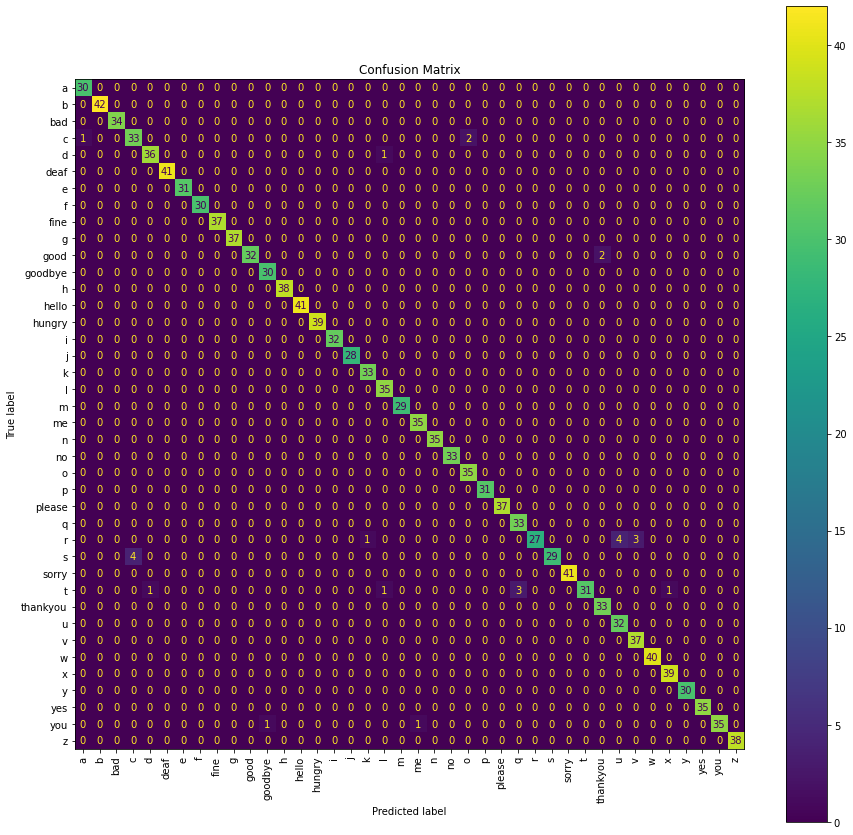

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(15, 15))
title = "Confusion Matrix"
ax.set_title(title)
ax.set_facecolor('tab:gray')

# Plot Confusion Matrix
plot_confusion_matrix(clf, X_test, y_test, ax=ax, display_labels=list(label_encoder.classes_))
# plot_confusion_matrix(clf, X_test, y_test, ax=ax, display_labels=list(label_encoder.classes_),
#                             cmap=plt.cm.Blues,
#                             normalize=None)

plt.xticks(rotation=90)

plt.savefig('confusion_matrix.jpg', format='jpg')
plt.show()

# **Train** Batch Classifiers and Normalizers

### Function

In [ ]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer, Normalizer

dict_classifiers = {
  "Logistic Regression": LogisticRegression(max_iter=1000,solver='saga'),
  "Nearest Neighbors": KNeighborsClassifier(),
  "RBF SVM": SVC(C=10000,gamma=0.1),
  "Linear SVM": SVC(kernel='linear'),
  "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100),
  "Decision Tree": tree.DecisionTreeClassifier(),
  "Random Forest": RandomForestClassifier(n_estimators=100),
  "Neural Net": MLPClassifier(alpha = 1),
  "Naive Bayes": GaussianNB(),
  "AdaBoost": AdaBoostClassifier(),
  "QDA": QuadraticDiscriminantAnalysis(),
  "Gaussian Process": GaussianProcessClassifier()
}

dict_normalizers = {
  'No Normalizer': None,
  'StandardScaler': StandardScaler(),
  'MinMaxScaler': MinMaxScaler(),
  'MaxAbsScaler': MaxAbsScaler(),
  'RobustScaler': RobustScaler(),
  'QuantileTransformer-Normal': QuantileTransformer(output_distribution='normal'),
  'QuantileTransformer-Uniform': QuantileTransformer(output_distribution='uniform'),
  'PowerTransformer-Yeo-Johnson': PowerTransformer(method='yeo-johnson'),
  'Normalizer': Normalizer()
}


def batch_classify(X_train, Y_train, X_test, Y_test, verbose = True):
  """
  This method, takes as input the X, Y matrices of the Train and Test set.
  And fits them on all of the Classifiers specified in the dict_classifier.
  The trained models, and accuracies are saved in a dictionary. The reason to use a dictionary
  is because it is very easy to save the whole dictionary with the pickle module.

  Usually, the SVM, Random Forest and Gradient Boosting Classifier take quiet some time to train.
  So it is best to train them on a smaller dataset first and
  decide whether you want to comment them out or not based on the test accuracy score.
  """

  dict_models = []
  for classifier_name, classifier in list(dict_classifiers.items()):
    for normalizer_name, normalizer in list(dict_normalizers.items()):
      t_start = time.time()
      pipe = Pipeline([('nomalizer', normalizer), ('clf', classifier)])
      pipe.fit(X_train, Y_train)
      t_end = time.time()

      t_diff = t_end - t_start
      train_score = pipe.score(X_train, Y_train)
      test_score = pipe.score(X_test, Y_test)

      dict_models.append([classifier_name, normalizer_name, train_score,
                          test_score, t_diff])

      if verbose:
        print("trained {c} in {f:.2f} s".format(c=classifier_name + '__' + normalizer_name, f=t_diff))
  return dict_models


def display_dict_models(dict_models, sort_by="Test_Score"):
  df = pd.DataFrame(dict_models, columns=["Classifier", "Normalizer", 
                                          "Train_Score", "Test_Score", 
                                          "Train_Time"])
  
  df = df.sort_values(by=sort_by, ascending=False)
  display(df)
  df.to_csv("/content/drive/MyDrive/Hand-Gesture-Recognition/batch_classifier_result.csv", index=False)


### Code

In [ ]:
# Train-Test Split
# X_tr, X_test, y_tr, y_test = train_test_split(X_train, y_train, test_size = 0.20, random_state=1234)

dict_models = batch_classify(X_train, y_train, X_test, y_test)
display_dict_models(dict_models)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


trained Logistic Regression__No Normalizer in 98.76 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


trained Logistic Regression__StandardScaler in 98.73 s
trained Logistic Regression__MinMaxScaler in 16.17 s
trained Logistic Regression__MaxAbsScaler in 54.58 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


trained Logistic Regression__RobustScaler in 98.48 s
trained Logistic Regression__QuantileTransformer-Normal in 48.91 s
trained Logistic Regression__QuantileTransformer-Uniform in 24.38 s
trained Logistic Regression__PowerTransformer-Yeo-Johnson in 58.47 s
trained Logistic Regression__Normalizer in 1.83 s
trained Nearest Neighbors__No Normalizer in 0.05 s
trained Nearest Neighbors__StandardScaler in 0.05 s
trained Nearest Neighbors__MinMaxScaler in 0.05 s
trained Nearest Neighbors__MaxAbsScaler in 0.04 s
trained Nearest Neighbors__RobustScaler in 0.11 s
trained Nearest Neighbors__QuantileTransformer-Normal in 1.24 s
trained Nearest Neighbors__QuantileTransformer-Uniform in 0.98 s
trained Nearest Neighbors__PowerTransformer-Yeo-Johnson in 1.73 s
trained Nearest Neighbors__Normalizer in 0.06 s
trained RBF SVM__No Normalizer in 2.40 s
trained RBF SVM__StandardScaler in 2.55 s
trained RBF SVM__MinMaxScaler in 1.16 s
trained RBF SVM__MaxAbsScaler in 1.21 s
trained RBF SVM__RobustScaler in 2

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


trained Neural Net__No Normalizer in 6.36 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


trained Neural Net__StandardScaler in 6.15 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


trained Neural Net__MinMaxScaler in 5.99 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


trained Neural Net__MaxAbsScaler in 5.99 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


trained Neural Net__RobustScaler in 6.55 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


trained Neural Net__QuantileTransformer-Normal in 7.37 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


trained Neural Net__QuantileTransformer-Uniform in 6.89 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


trained Neural Net__PowerTransformer-Yeo-Johnson in 8.16 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


trained Neural Net__Normalizer in 6.02 s
trained Naive Bayes__No Normalizer in 0.01 s
trained Naive Bayes__StandardScaler in 0.02 s
trained Naive Bayes__MinMaxScaler in 0.02 s
trained Naive Bayes__MaxAbsScaler in 0.02 s
trained Naive Bayes__RobustScaler in 0.10 s
trained Naive Bayes__QuantileTransformer-Normal in 1.21 s
trained Naive Bayes__QuantileTransformer-Uniform in 0.96 s
trained Naive Bayes__PowerTransformer-Yeo-Johnson in 1.67 s
trained Naive Bayes__Normalizer in 0.01 s
trained AdaBoost__No Normalizer in 3.90 s
trained AdaBoost__StandardScaler in 3.87 s
trained AdaBoost__MinMaxScaler in 3.79 s
trained AdaBoost__MaxAbsScaler in 3.80 s
trained AdaBoost__RobustScaler in 4.02 s
trained AdaBoost__QuantileTransformer-Normal in 5.27 s
trained AdaBoost__QuantileTransformer-Uniform in 5.07 s
trained AdaBoost__PowerTransformer-Yeo-Johnson in 5.62 s
trained AdaBoost__Normalizer in 2.81 s


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


trained QDA__No Normalizer in 0.10 s


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


trained QDA__StandardScaler in 0.11 s


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


trained QDA__MinMaxScaler in 0.11 s


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


trained QDA__MaxAbsScaler in 0.11 s


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


trained QDA__RobustScaler in 0.20 s


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


trained QDA__QuantileTransformer-Normal in 1.36 s


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


trained QDA__QuantileTransformer-Uniform in 1.11 s


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


trained QDA__PowerTransformer-Yeo-Johnson in 1.80 s


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


trained QDA__Normalizer in 0.10 s
trained Gaussian Process__No Normalizer in 92.23 s
trained Gaussian Process__StandardScaler in 202.26 s
trained Gaussian Process__MinMaxScaler in 130.16 s
trained Gaussian Process__MaxAbsScaler in 130.15 s
trained Gaussian Process__RobustScaler in 113.61 s
trained Gaussian Process__QuantileTransformer-Normal in 655.15 s
trained Gaussian Process__QuantileTransformer-Uniform in 91.99 s
trained Gaussian Process__PowerTransformer-Yeo-Johnson in 212.69 s
trained Gaussian Process__Normalizer in 150.81 s


,Classifier,Normalizer,Train_Score,Test_Score,Train_Time
2,Logistic Regression,MinMaxScaler,0.98750,0.770000,16.172940
29,Linear SVM,MinMaxScaler,0.99500,0.760000,0.585726
3,Logistic Regression,MaxAbsScaler,0.99125,0.750000,54.579477
30,Linear SVM,MaxAbsScaler,0.99750,0.750000,0.561661
28,Linear SVM,StandardScaler,1.00000,0.742500,0.700425
...,...,...,...,...,...
106,Gaussian Process,PowerTransformer-Yeo-Johnson,1.00000,0.026667,212.685020
18,RBF SVM,No Normalizer,1.00000,0.025000,2.396608
99,Gaussian Process,No Normalizer,1.00000,0.025000,92.230726
104,Gaussian Process,QuantileTransformer-Normal,1.00000,0.025000,655.149354


In [ ]:
print(train_users)
print(test_users)

['001', '003', '005', '006']
['002', '004', '007']


In [ ]:
display_dict_models(dict_models)

,Classifier,Normalizer,Train_Score,Test_Score,Train_Time
28,Linear SVM,StandardScaler,1.000000,0.7250,1.222844
34,Linear SVM,PowerTransformer-Yeo-Johnson,1.000000,0.7225,3.450990
3,Logistic Regression,MaxAbsScaler,0.982500,0.7125,67.113403
30,Linear SVM,MaxAbsScaler,0.995833,0.7100,0.992157
70,Neural Net,PowerTransformer-Yeo-Johnson,1.000000,0.7075,11.366294
...,...,...,...,...,...
99,Gaussian Process,No Normalizer,1.000000,0.0250,207.879025
89,AdaBoost,Normalizer,0.050417,0.0250,4.315814
18,RBF SVM,No Normalizer,1.000000,0.0250,5.353339
104,Gaussian Process,QuantileTransformer-Normal,1.000000,0.0250,2110.813554


#**Analysis_1** 

### Test set prediction result for each user

## **Code**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# selected_users = ['001', '002', '003']
selected_users = users

# Iterate over users as single test case
for test_users in selected_users:
  test_users = [test_users]
  train_users = [x for x in selected_users if x not in test_users]

  # Update X_train, y_train
  X_train = pd.DataFrame()
  y_train = np.array([])

  if isinstance(train_users, list):
    for user in train_users:
      X_train = X_train.append(feature_sets[int(user)-1], ignore_index=True)
      y_train = np.append(y_train, label_sets[int(user)-1])
  else:
    raise ValueError("Train set type must be a 'list'.")
  

  # Update X_test, y_test
  X_test = pd.DataFrame()
  y_test = np.array([])

  if isinstance(test_users, list):
    for user in test_users:
      X_test = X_test.append(feature_sets[int(user)-1], ignore_index=True)
      y_test = np.append(y_test, label_sets[int(user)-1])
  else:
    raise ValueError("Test set type must be a 'list'.")

  X_train, y_train = shuffle(X_train, y_train, random_state=43)


  accuracy = 0
  num_iter = 5
  failed_classes = set()
  for i in range(num_iter):
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy += accuracy_score(y_test,y_pred)
    failed_classes = failed_classes.union(set(y_test.astype(int)) - set(y_pred.astype(int)))
  accuracy /= num_iter

  failed_classes = label_encoder.inverse_transform(list(failed_classes))


  print('|' , end=' ')
  print(*train_users, sep=", ", end=' ')
  print('|' , end=' ')
  print(*test_users, end=' ')
  print('|' , end=' ')
  print("%0.2f" %(accuracy), end=' ')
  print('|' , end=' ')
  print(*failed_classes, sep=", ", end=' ')
  print('|' , end='\n')


| 002, 003, 004, 005, 006, 007 | 001 | 0.90 | c, r |
| 001, 003, 004, 005, 006, 007 | 002 | 0.91 | t |
| 001, 002, 004, 005, 006, 007 | 003 | 0.86 | o |
| 001, 002, 003, 005, 006, 007 | 004 | 0.70 | x, hungry, n, sorry, t |
| 001, 002, 003, 004, 006, 007 | 005 | 0.80 | l, good, s, t |
| 001, 002, 003, 004, 005, 007 | 006 | 0.78 | u, v, c, o |
| 001, 002, 003, 004, 005, 006 | 007 | 0.62 | a, e, m, me, n, s, t, u, v, x, you |


## Result




---

> Single User Test Set [UNFILTERED] [FLEX, GYR, ACC_world]

---


| Train Set | Test Set | Accuracy | Failed Classes |
| :---: |:---:| :---: | :---: |
| 002, 003, 004, 005, 006, 007 | 001 | 0.89 | r, t |
| 001, 003, 004, 005, 006, 007 | 002 | 0.89 |  |
| 001, 002, 004, 005, 006, 007 | 003 | 0.86 | t, o |
| 001, 002, 003, 005, 006, 007 | 004 | 0.69 | n, hungry, sorry, t |
| 001, 002, 003, 004, 006, 007 | 005 | 0.78 | l, good, t |
| 001, 002, 003, 004, 005, 007 | 006 | 0.79 | u, c, o |
| 001, 002, 003, 004, 005, 006 | 007 | 0.61 | a, v, x, e, n, s, t |



---


> Single User Test Set [FILTERED] [FLEX, GYR, ACC_world]

---


| Train Set | Test Set | Accuracy | Failed Classes |
| :---: |:---:| :---: | :---: |
| 002, 003, 004, 005, 006, 007 | 001 | 0.90 | r, t |
| 001, 003, 004, 005, 006, 007 | 002 | 0.92 | t |
| 001, 002, 004, 005, 006, 007 | 003 | 0.86 | t, o |
| 001, 002, 003, 005, 006, 007 | 004 | 0.70 | x, n, hungry, t |
| 001, 002, 003, 004, 006, 007 | 005 | 0.80 | l, good, s, t |
| 001, 002, 003, 004, 005, 007 | 006 | 0.79 | u, v, c, d, o |
| 001, 002, 003, 004, 005, 006 | 007 | 0.62 | a, e, m, n, s, t, u, v, x, you |


---

> Single User Test Set [FILTERED] [FLEX, GYR, ACC_raw]

---

| Train Set | Test Set | Accuracy | Failed Classes |
| :---: |:---:| :---: | :---: |
| 002, 003, 004, 005, 006, 007 | 001 | 0.86 | c, r, t |
| 001, 003, 004, 005, 006, 007 | 002 | 0.89 |  |
| 001, 002, 004, 005, 006, 007 | 003 | 0.87 |  |
| 001, 002, 003, 005, 006, 007 | 004 | 0.72 | x, deaf, hungry, n |
| 001, 002, 003, 004, 006, 007 | 005 | 0.81 | l, t |
| 001, 002, 003, 004, 005, 007 | 006 | 0.84 | v, c, d, o |
| 001, 002, 003, 004, 005, 006 | 007 | 0.64 | a, u, v, x, e, you, m, n, s, t |

---

> Single User Test Set and Variable User Train  [FILTERED] [FLEX, GYR, ACC_body]

---
| Train Set | Test Set | Accuracy | Failed Classes |
| :---: |:---:| :---: | :---: |
| 002, 003, 004, 005, 006, 007 | 001 | 0.89 | r, t |
| 001, 003, 004, 005, 006, 007 | 002 | 0.93 | x |
| 001, 002, 004, 005, 006, 007 | 003 | 0.87 | t, o |
| 001, 002, 003, 005, 006, 007 | 004 | 0.69 | x, deaf, n, t, sorry, hungry |
| 001, 002, 003, 004, 006, 007 | 005 | 0.81 | l, good, s, t |
| 001, 002, 003, 004, 005, 007 | 006 | 0.80 | u, c, d, o |
| 001, 002, 003, 004, 005, 006 | 007 | 0.62 | a, e, m, n, s, t, thankyou, v, x, you |

---

> Single User Test Set and Variable User Train  [SCALED] [FILTERED] [FLEX, GYR, ACC_world]

---
| Train Set | Test Set | Accuracy | Failed Classes |
| :---: |:---:| :---: | :---: |
| 002, 003, 004, 005, 006, 007 | 001 | 0.91 | r |
| 001, 003, 004, 005, 006, 007 | 002 | 0.92 |  |
| 001, 002, 004, 005, 006, 007 | 003 | 0.86 | t, o |
| 001, 002, 003, 005, 006, 007 | 004 | 0.70 | x, hungry, n, sorry, t |
| 001, 002, 003, 004, 006, 007 | 005 | 0.79 | l, good, s |
| 001, 002, 003, 004, 005, 007 | 006 | 0.78 | u, k, c, d, o |
| 001, 002, 003, 004, 005, 006 | 007 | 0.61 | a, deaf, e, m, me, n, s, t, v, x, you |

---


###**Result**

#**Analysis_2** 

### Test set prediction result for each test user for variable number of train users

## Code

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

# selected_users = ['001', '002', '003']
selected_users = users

# Iterate over users as single test case
for test_users in selected_users:
  test_users = [test_users]
  train_users_total = [x for x in selected_users if x not in test_users]
  train_users = []

  for u in train_users_total:
    train_users.append(u)

    # Update X_train, y_train
    X_train = pd.DataFrame()
    y_train = np.array([])

    if isinstance(train_users, list):
      for user in train_users:
        X_train = X_train.append(feature_sets[int(user)-1], ignore_index=True)
        y_train = np.append(y_train, label_sets[int(user)-1])
    else:
      raise ValueError("Train set type must be a 'list'.")
    

    # Update X_test, y_test
    X_test = pd.DataFrame()
    y_test = np.array([])

    if isinstance(test_users, list):
      for user in test_users:
        X_test = X_test.append(feature_sets[int(user)-1], ignore_index=True)
        y_test = np.append(y_test, label_sets[int(user)-1])
    else:
      raise ValueError("Test set type must be a 'list'.")

    X_train, y_train = shuffle(X_train, y_train, random_state=43)
    
    accuracy = 0
    num_iter = 5
    failed_classes = set()
    for i in range(num_iter):
      clf = RandomForestClassifier(n_estimators=100)
      clf.fit(X_train,y_train)
      y_pred = clf.predict(X_test)
      accuracy += accuracy_score(y_test,y_pred)
      failed_classes = failed_classes.union(set(y_test.astype(int)) - set(y_pred.astype(int)))
    accuracy /= num_iter

    failed_classes = label_encoder.inverse_transform(list(failed_classes))  

    print('|' , end=' ')
    print(*train_users, sep=", ", end=' ')
    print('|' , end=' ')
    print(*test_users, end=' ')
    print('|' , end=' ')
    print("%0.2f" %(accuracy), end=' ')
    print('|' , end=' ')
    print(*failed_classes, sep=", ", end=' ')
    print('|' , end='\n')


NameError: ignored

## Result


---

> Single User Test Set and Variable User Train  [UNFILTERED] [FLEX, GYR, ACC_world]

---


| Train Set | Test Set | Accuracy | Failed Classes |
| :---: |:---:| :---: | :---: |
| 002 | 001 | 0.57 | a, d, e, f, i, k, l, m, me, n, r, w |
| 002, 003 | 001 | 0.82 | u, x, me, r, s |
| 002, 003, 004 | 001 | 0.86 | u, x, me, r, s |
| 002, 003, 004, 005 | 001 | 0.87 | r, s |
| 002, 003, 004, 005, 006 | 001 | 0.88 | r, s, t |
| 002, 003, 004, 005, 006, 007 | 001 | 0.88 | r |
| 001 | 002 | 0.64 | b, v, x, me, r, i |
| 001, 003 | 002 | 0.85 | x, r |
| 001, 003, 004 | 002 | 0.89 | x |
| 001, 003, 004, 005 | 002 | 0.89 | x |
| 001, 003, 004, 005, 006 | 002 | 0.90 |  |
| 001, 003, 004, 005, 006, 007 | 002 | 0.90 |  |
| 001 | 003 | 0.67 | c, e, you, s |
| 001, 002 | 003 | 0.83 | v, o, p, s, t |
| 001, 002, 004 | 003 | 0.88 | s, o |
| 001, 002, 004, 005 | 003 | 0.85 | t |
| 001, 002, 004, 005, 006 | 003 | 0.85 | t, o |
| 001, 002, 004, 005, 006, 007 | 003 | 0.86 | e, o, t |
| 001 | 004 | 0.46 | c, fine, good, hungry, me, n, q, sorry, t, v, x, yes, you |
| 001, 002 | 004 | 0.57 | x, deaf, you, yes, fine, good, hungry, me, n, t |
| 001, 002, 003 | 004 | 0.64 | x, deaf, fine, good, hungry, n, sorry, t |
| 001, 002, 003, 005 | 004 | 0.67 | n, t, fine, q, hungry |
| 001, 002, 003, 005, 006 | 004 | 0.68 | x, n, hungry, hello, t |
| 001, 002, 003, 005, 006, 007 | 004 | 0.67 | x, n, t, sorry, hungry |
| 001 | 005 | 0.61 | k, l, n, good, t, thankyou |
| 001, 002 | 005 | 0.78 | good |
| 001, 002, 003 | 005 | 0.74 | k, l, good, t |
| 001, 002, 003, 004 | 005 | 0.77 | l, good, t |
| 001, 002, 003, 004, 006 | 005 | 0.81 | l, good, t |
| 001, 002, 003, 004, 006, 007 | 005 | 0.79 | l, t |
| 001 | 006 | 0.52 | c, you, good, me, n, o, q, t, thankyou |
| 001, 002 | 006 | 0.67 | u, v, c, n, o |
| 001, 002, 003 | 006 | 0.70 | u, v, c, k, o |
| 001, 002, 003, 004 | 006 | 0.78 | u, v, c, k, o |
| 001, 002, 003, 004, 005 | 006 | 0.80 | u, c, o |
| 001, 002, 003, 004, 005, 007 | 006 | 0.79 | u, c, o |
| 001 | 007 | 0.46 | a, d, e, g, i, m, me, n, q, r, s, sorry, t, thankyou, u, x, you |
| 001, 002 | 007 | 0.53 | a, d, e, i, k, l, m, me, n, s, t, v, x, you |
| 001, 002, 003 | 007 | 0.57 | a, e, l, m, me, n, q, s, t, v, x, you |
| 001, 002, 003, 004 | 007 | 0.61 | a, x, e, m, n, s, t |
| 001, 002, 003, 004, 005 | 007 | 0.60 | a, e, l, m, me, n, s, t, v, x, you |
| 001, 002, 003, 004, 005, 006 | 007 | 0.62 | a, u, v, x, e, l, n, s, t |



---

> Single User Test Set and Variable User Train  [FILTERED] [FLEX, GYR, ACC_world]

---


| Train Set | Test Set | Accuracy | Failed Classes |
| :---: |:---:| :---: | :---: |
| 002 | 001 | 0.59 | a, w, e, k, l, m, me, n |
| 002, 003 | 001 | 0.79 | u, x, d, m, me, r, s |
| 002, 003, 004 | 001 | 0.86 | me, r, s |
| 002, 003, 004, 005 | 001 | 0.89 | r, s |
| 002, 003, 004, 005, 006 | 001 | 0.90 | r, t |
| 002, 003, 004, 005, 006, 007 | 001 | 0.90 | r |
| 001 | 002 | 0.60 | u, b, x, y, i, l, me, n, p, r, t |
| 001, 003 | 002 | 0.85 | p, r |
| 001, 003, 004 | 002 | 0.90 | x, t |
| 001, 003, 004, 005 | 002 | 0.92 | x |
| 001, 003, 004, 005, 006 | 002 | 0.90 |  |
| 001, 003, 004, 005, 006, 007 | 002 | 0.91 |  |
| 001 | 003 | 0.59 | v, c, y, you, hungry, p, q, s |
| 001, 002 | 003 | 0.84 | p, s, t |
| 001, 002, 004 | 003 | 0.87 |  |
| 001, 002, 004, 005 | 003 | 0.84 | p |
| 001, 002, 004, 005, 006 | 003 | 0.85 | p, t |
| 001, 002, 004, 005, 006, 007 | 003 | 0.87 | t, o |
| 001 | 004 | 0.40 | fine, good, hungry, k, me, n, q, sorry, t, u, v, y, yes, you |
| 001, 002 | 004 | 0.59 | deaf, yes, you, fine, good, hello, hungry, me, n, sorry, t |
| 001, 002, 003 | 004 | 0.64 | x, deaf, fine, good, hungry, n, sorry, t |
| 001, 002, 003, 005 | 004 | 0.66 | n, hungry, t |
| 001, 002, 003, 005, 006 | 004 | 0.69 | x, hello, hungry, n, t |
| 001, 002, 003, 005, 006, 007 | 004 | 0.70 | x, n, hungry, t |
| 001 | 005 | 0.58 | v, x, d, y, k, l, n, q, t |
| 001, 002 | 005 | 0.73 | k, v, l, d, good |
| 001, 002, 003 | 005 | 0.73 | v, good, k, l, s, t |
| 001, 002, 003, 004 | 005 | 0.76 | good, l |
| 001, 002, 003, 004, 006 | 005 | 0.79 | l, good, s, t |
| 001, 002, 003, 004, 006, 007 | 005 | 0.79 | l |
| 001 | 006 | 0.47 | c, d, x, you, good, k, me, t, thankyou |
| 001, 002 | 006 | 0.70 | u, v, c, n, o |
| 001, 002, 003 | 006 | 0.72 | u, v, c, k, o, q, t |
| 001, 002, 003, 004 | 006 | 0.79 | u, v, c, k, o, s |
| 001, 002, 003, 004, 005 | 006 | 0.79 | u, c, o |
| 001, 002, 003, 004, 005, 007 | 006 | 0.78 | u, c, o |
| 001 | 007 | 0.43 | a, b, d, e, g, i, m, me, n, q, r, s, t, thankyou, u, x, you |
| 001, 002 | 007 | 0.52 | a, d, e, i, k, l, m, me, n, q, s, t, u, v, x, you |
| 001, 002, 003 | 007 | 0.56 | a, e, l, m, me, n, q, s, t, u, v, x, you |
| 001, 002, 003, 004 | 007 | 0.61 | a, e, m, me, n, q, s, t, thankyou, v, x, you |
| 001, 002, 003, 004, 005 | 007 | 0.59 | a, deaf, e, m, me, n, s, t, v, x, you |
| 001, 002, 003, 004, 005, 006 | 007 | 0.63 | a, u, v, x, e, you, m, n, s, t |


---

> Single User Test Set and Variable User Train  [FILTERED] [FLEX, GYR, ACC_raw]

---
| Train Set | Test Set | Accuracy | Failed Classes |
| :---: |:---:| :---: | :---: |
| 002 | 001 | 0.58 | a, w, f, i, m, me, n |
| 002, 003 | 001 | 0.77 | x, d, m, me, r, s, t |
| 002, 003, 004 | 001 | 0.85 | x, me, r, s |
| 002, 003, 004, 005 | 001 | 0.87 | r, n |
| 002, 003, 004, 005, 006 | 001 | 0.88 | r, t |
| 002, 003, 004, 005, 006, 007 | 001 | 0.86 | c, r, t |
| 001 | 002 | 0.55 | x, y, h, i, p, please, r |
| 001, 003 | 002 | 0.86 | x, r |
| 001, 003, 004 | 002 | 0.90 | x, t |
| 001, 003, 004, 005 | 002 | 0.89 | x |
| 001, 003, 004, 005, 006 | 002 | 0.88 | o |
| 001, 003, 004, 005, 006, 007 | 002 | 0.90 |  |
| 001 | 003 | 0.59 | y, d, you, e, hungry, n, p, s |
| 001, 002 | 003 | 0.84 | v, c, s, t |
| 001, 002, 004 | 003 | 0.89 | c, s |
| 001, 002, 004, 005 | 003 | 0.85 | c |
| 001, 002, 004, 005, 006 | 003 | 0.86 | t |
| 001, 002, 004, 005, 006, 007 | 003 | 0.87 |  |
| 001 | 004 | 0.44 | v, c, yes, you, f, hungry, me, n, t |
| 001, 002 | 004 | 0.64 | yes, deaf, hungry, k, me, n, sorry, t |
| 001, 002, 003 | 004 | 0.71 | x, deaf, hungry, n, sorry, t |
| 001, 002, 003, 005 | 004 | 0.73 | c, x, deaf, hungry, n, t |
| 001, 002, 003, 005, 006 | 004 | 0.73 | x, deaf, hungry, n |
| 001, 002, 003, 005, 006, 007 | 004 | 0.72 | x, deaf, hungry, n, sorry, t |
| 001 | 005 | 0.57 | x, y, d, good, k, l, p, t |
| 001, 002 | 005 | 0.79 | l, d, t |
| 001, 002, 003 | 005 | 0.78 | l, s, t |
| 001, 002, 003, 004 | 005 | 0.80 | l, good, s |
| 001, 002, 003, 004, 006 | 005 | 0.82 | l, me, good, t |
| 001, 002, 003, 004, 006, 007 | 005 | 0.80 | l, t |
| 001 | 006 | 0.52 | c, d, x, you, f, k, me, thankyou |
| 001, 002 | 006 | 0.71 | u, v, c, you, n, o |
| 001, 002, 003 | 006 | 0.79 | u, v, c, o |
| 001, 002, 003, 004 | 006 | 0.84 | u, v, c, o, s |
| 001, 002, 003, 004, 005 | 006 | 0.85 | c, o |
| 001, 002, 003, 004, 005, 007 | 006 | 0.84 | v, c, d, o |
| 001 | 007 | 0.41 | a, d, e, h, m, me, n, p, r, s, thankyou, u, x, you |
| 001, 002 | 007 | 0.54 | a, e, hello, i, l, m, me, n, s, t, v, x, you |
| 001, 002, 003 | 007 | 0.60 | a, e, i, l, m, n, s, t, v, x |
| 001, 002, 003, 004 | 007 | 0.63 | a, v, x, e, hello, m, n, s, t |
| 001, 002, 003, 004, 005 | 007 | 0.62 | a, deaf, e, m, me, n, s, t, v, x, you |
| 001, 002, 003, 004, 005, 006 | 007 | 0.62 | a, v, x, e, m, n, s, t |

---

> Single User Test Set and Variable User Train  [FILTERED] [FLEX, GYR, ACC_body]

---
| Train Set | Test Set | Accuracy | Failed Classes |
| :---: |:---:| :---: | :---: |
| 002 | 001 | 0.59 | a, k, w, m, n |
| 002, 003 | 001 | 0.79 | u, x, m, me, r, s |
| 002, 003, 004 | 001 | 0.88 | x, me, r, s |
| 002, 003, 004, 005 | 001 | 0.89 | r |
| 002, 003, 004, 005, 006 | 001 | 0.89 | r, s, t |
| 002, 003, 004, 005, 006, 007 | 001 | 0.89 | r, me, t |
| 001 | 002 | 0.58 | v, b, x, y, i, p, r |
| 001, 003 | 002 | 0.83 | p, r, x |
| 001, 003, 004 | 002 | 0.90 | x, t |
| 001, 003, 004, 005 | 002 | 0.89 |  |
| 001, 003, 004, 005, 006 | 002 | 0.90 |  |
| 001, 003, 004, 005, 006, 007 | 002 | 0.92 | x |
| 001 | 003 | 0.57 | c, you, h, hungry, i, p, q, s |
| 001, 002 | 003 | 0.84 | p, s, t |
| 001, 002, 004 | 003 | 0.88 | s |
| 001, 002, 004, 005 | 003 | 0.85 | c |
| 001, 002, 004, 005, 006 | 003 | 0.85 | t |
| 001, 002, 004, 005, 006, 007 | 003 | 0.88 | t, o |
| 001 | 004 | 0.37 | good, hungry, k, me, n, q, sorry, t, thankyou, v, x, y, yes, you |
| 001, 002 | 004 | 0.60 | deaf, you, hello, hungry, m, me, n, sorry, t |
| 001, 002, 003 | 004 | 0.67 | x, deaf, yes, good, hello, hungry, n, sorry, t |
| 001, 002, 003, 005 | 004 | 0.69 | deaf, hungry, n, t |
| 001, 002, 003, 005, 006 | 004 | 0.70 | x, n, hungry |
| 001, 002, 003, 005, 006, 007 | 004 | 0.69 | x, deaf, hungry, n, sorry, t |
| 001 | 005 | 0.58 | v, x, y, good, l, n, t |
| 001, 002 | 005 | 0.77 | good, l, s |
| 001, 002, 003 | 005 | 0.77 | v, l, good, t |
| 001, 002, 003, 004 | 005 | 0.79 | l, good, t |
| 001, 002, 003, 004, 006 | 005 | 0.83 | l, good, s, t |
| 001, 002, 003, 004, 006, 007 | 005 | 0.81 | l, good, s |
| 001 | 006 | 0.43 | c, d, x, you, g, me, o, q, t, thankyou |
| 001, 002 | 006 | 0.70 | u, v, c, you, o |
| 001, 002, 003 | 006 | 0.75 | u, v, c, k, o, t |
| 001, 002, 003, 004 | 006 | 0.79 | u, v, c, k, o |
| 001, 002, 003, 004, 005 | 006 | 0.81 | u, c, o |
| 001, 002, 003, 004, 005, 007 | 006 | 0.81 | u, c, d, o |
| 001 | 007 | 0.42 | a, d, e, g, m, me, n, q, r, s, t, thankyou, u, x, you |
| 001, 002 | 007 | 0.52 | a, d, e, hello, i, k, l, m, me, n, q, s, v, x, you |
| 001, 002, 003 | 007 | 0.56 | a, e, l, m, me, n, q, s, t, u, v, x, you |
| 001, 002, 003, 004 | 007 | 0.62 | a, e, hello, m, me, n, q, s, t, v, x, you |
| 001, 002, 003, 004, 005 | 007 | 0.60 | a, deaf, e, m, me, n, s, t, v, x, you |
| 001, 002, 003, 004, 005, 006 | 007 | 0.61 | a, e, m, n, s, t, thankyou, u, v, x, you |

---

#**Analysis_3** 

### Test set prediction result for each user per batch classifier


## **Code**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer, Normalizer


dict_classifiers = {
  "Logistic Regression": LogisticRegression(max_iter=1000,solver='saga'),
  "Nearest Neighbors": KNeighborsClassifier(),
  "RBF SVM": SVC(C=10000,gamma=0.1),
  "Linear SVM": SVC(kernel='linear'),
  "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
  "Decision Tree": tree.DecisionTreeClassifier(),
  "Random Forest": RandomForestClassifier(n_estimators=100),
  "Neural Net": MLPClassifier(alpha = 1),
  "Naive Bayes": GaussianNB(),
  "AdaBoost": AdaBoostClassifier(),
  "QDA": QuadraticDiscriminantAnalysis(),
  "Gaussian Process": GaussianProcessClassifier()
}

dict_normalizers = {
  'No Normalizer': None,
  'StandardScaler': StandardScaler(),
  'MinMaxScaler': MinMaxScaler(),
  'MaxAbsScaler': MaxAbsScaler(),
  'RobustScaler': RobustScaler(),
  'QuantileTransformer-Normal': QuantileTransformer(output_distribution='normal'),
  'QuantileTransformer-Uniform': QuantileTransformer(output_distribution='uniform'),
  'PowerTransformer-Yeo-Johnson': PowerTransformer(method='yeo-johnson'),
  'Normalizer': Normalizer()
}

#@markdown ###Select classifier
classifier = "RBF SVM" #@param ["Logistic Regression", "Nearest Neighbors", "RBF SVM", "Linear SVM", "Gradient Boosting Classifier", "Decision Tree", "Random Forest", "Neural Net", "Naive Bayes", "AdaBoost", "QDA", "Gaussian Process"]
clf = dict_classifiers[classifier]


# selected_users = ['001', '002', '003']
selected_users = users
data_list = []

print("---\n---\n> Single User Test Set Normalizers Per Classifier [FILTERED] [FLEX, GYR, ACC_world] \n---\n---\n")
print("---\n**" + classifier + "**\n---")
print('| Classifier | Normalizer | Train Set | Test Set | Train Score | Test Score | Train Time | Failed Classes |')
print('|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|')


# Iterate over users as single test case
for test_users in selected_users:
  test_users = [test_users]
  train_users = [x for x in selected_users if x not in test_users]

  # Update X_train, y_train
  X_train = pd.DataFrame()
  y_train = np.array([])

  if isinstance(train_users, list):
    for user in train_users:
      X_train = X_train.append(feature_sets[int(user)-1], ignore_index=True)
      y_train = np.append(y_train, label_sets[int(user)-1])
  else:
    raise ValueError("Train set type must be a 'list'.")
  

  # Update X_test, y_test
  X_test = pd.DataFrame()
  y_test = np.array([])

  if isinstance(test_users, list):
    for user in test_users:
      X_test = X_test.append(feature_sets[int(user)-1], ignore_index=True)
      y_test = np.append(y_test, label_sets[int(user)-1])
  else:
    raise ValueError("Test set type must be a 'list'.")

  X_train, y_train = shuffle(X_train, y_train, random_state=43)

    
  for normalizer_name, normalizer in list(dict_normalizers.items()):
    train_score = 0
    test_score = 0
    train_time = 0 
    num_iter = 1
    failed_classes = set()
    for i in range(num_iter):
      t_start = time.time()
      pipe = Pipeline([('nomalizer', normalizer), ('clf', clf)])
      pipe.fit(X_train, y_train)
      t_end = time.time()

      train_time += t_end - t_start
      train_score += pipe.score(X_train, y_train)
      y_pred = pipe.predict(X_test)
      test_score += accuracy_score(y_test,y_pred)
      failed_classes = failed_classes.union(set(y_test.astype(int)) - set(y_pred.astype(int)))
    train_time /= num_iter
    train_score /= num_iter
    test_score /= num_iter
    failed_classes = label_encoder.inverse_transform(list(failed_classes))

    data_list.append([classifier, normalizer_name, train_users, test_users, 
                        train_score, test_score, train_time, failed_classes])

    print('|' , end=' ')
    print(classifier, end=' ')
    print('|' , end=' ')
    print(normalizer_name, end=' ')
    print('|' , end=' ')
    print(*train_users, sep=", ", end=' ')
    print('|' , end=' ')
    print(*test_users, end=' ')
    print('|' , end=' ')
    print("%0.2f" %(train_score), end=' ')
    print('|' , end=' ')
    print("%0.2f" %(test_score), end=' ')
    print('|' , end=' ')
    print("%0.3f" %(train_time), end=' ')
    print('|' , end=' ')
    print(*failed_classes, sep=", ", end=' ')
    print('|' , end='\n')

df = pd.DataFrame(data_list, columns=["Classifier", "Normalizer", 
                                       "Train Set", "Test Set",
                                       "Train_Score", "Test_Score", 
                                       "Train_Time", "Failed Classes"])
  
# df = df.sort_values(by=sort_by, ascending=False)
# display(df)
df.to_csv("/content/drive/MyDrive/Hand-Gesture-Recognition/Analysis_3_" + classifier +".csv", index=False)




---
---
> Single User Test Set Normalizers Per Classifier [FILTERED] [FLEX, GYR, ACC_world] 
---
---

---
**RBF SVM**
---
| Classifier | Normalizer | Train Set | Test Set | Train Score | Test Score | Train Time | Failed Classes |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| RBF SVM | No Normalizer | 002, 003, 004, 005, 006, 007 | 001 | 1.00 | 0.03 | 5.386 | a, b, bad, c, d, deaf, e, f, fine, g, good, goodbye, h, hello, hungry, i, j, k, l, m, me, n, no, o, p, please, q, r, s, sorry, t, thankyou, u, v, w, x, y, yes, you |
| RBF SVM | StandardScaler | 002, 003, 004, 005, 006, 007 | 001 | 1.00 | 0.21 | 5.771 | bad, deaf, fine, g, good, goodbye, hello, hungry, j, me, no, s, sorry, thankyou, yes, you, z |
| RBF SVM | MinMaxScaler | 002, 003, 004, 005, 006, 007 | 001 | 1.00 | 0.88 | 1.995 | r |
| RBF SVM | MaxAbsScaler | 002, 003, 004, 005, 006, 007 | 001 | 1.00 | 0.88 | 2.105 | r |
| RBF SVM | RobustScaler | 002, 003, 004, 005, 006, 007 | 001 | 1.00 | 0.20 | 5.678 | bad, deaf, yes, f,